In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import IPython.display as display
from PIL import Image
import os
import pathlib

In [4]:
import scipy as sp

In [5]:

test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=45,
                                  width_shift_range=.15,
                                  height_shift_range=.15,
                                  horizontal_flip=True,
                                  zoom_range=0.5
                                  )

train_datagen = ImageDataGenerator(rescale=1./255)

IMG_WIDTH,IMG_HEIGHT = (128,128)
batch_size = 32

In [6]:
train_generator = train_datagen.flow_from_directory(directory='./data/animals10/train', classes=['dog','cat','elephant','sheep','spider','sqirle','cow','chicken','horse','butterfly'], batch_size=batch_size, target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 14181 images belonging to 10 classes.


In [7]:
test_generator = train_datagen.flow_from_directory(directory='./data/animals10/valid', classes=['dog','cat','elephant','sheep','spider','sqirle','cow','chicken','horse','butterfly'], batch_size=batch_size, target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 4564 images belonging to 10 classes.


In [8]:
from tensorflow.keras import regularizers

In [57]:
model = Sequential(
    [Conv2D(50, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
     MaxPool2D(),
     Dropout(0.2),
     Conv2D(32, 3, padding='same', activation='relu'),
     MaxPool2D(),
     Dropout(0.2),
     Conv2D(32, 3, padding='same', activation='relu'),
     MaxPool2D(),
     Dropout(0.2),
     Conv2D(16, 3, padding='same', activation='relu'),
     MaxPool2D(),
     Dropout(0.2),
     Flatten(),
     Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
     Dropout(0.2),
     Dense(10, activation='softmax')
    ])#new_model_1

In [44]:
model = Sequential(
    [Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
     Dropout(0.4),
     Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
     Dropout(0.4),
     MaxPool2D(),
     Conv2D(64, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
     Dropout(0.4),
     Conv2D(64, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
     Dropout(0.4),
     MaxPool2D(),
     Conv2D(128, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
     Dropout(0.4),
     Conv2D(128, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
     Dropout(0.4),
     MaxPool2D(),
     Flatten(),
     Dense(10, activation='softmax')
    ])#new_model

In [25]:
model = Sequential(
    [Conv2D(64, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
      Dropout(0.4),
     Conv2D(64, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
      Dropout(0.4),
       MaxPool2D(),
     
     Conv2D(128, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
      Dropout(0.4),
     Conv2D(128, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
      Dropout(0.4),
       MaxPool2D(),
     
     Conv2D(256, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
      Dropout(0.4),
     Conv2D(256, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
      Dropout(0.4),
      Conv2D(256, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
      Dropout(0.4),
     Conv2D(256, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
      Dropout(0.4),
       MaxPool2D(),
     
     Conv2D(512, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
      Dropout(0.4),
     Conv2D(512, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
      Dropout(0.4),
      Conv2D(512, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
      Dropout(0.4),
     Conv2D(512, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
      Dropout(0.4),
       MaxPool2D(),
     
     Conv2D(512, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
      Dropout(0.4),
     Conv2D(512, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
      Dropout(0.4),
      Conv2D(512, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
      Dropout(0.4),
     Conv2D(512, 3, padding='same', activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
      Dropout(0.4),
       MaxPool2D(),
     
      Flatten(),
     Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.0001),),
     Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.0001),),
     Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.0001),),
     Dense(10, activation='softmax')
    ]) #new_model_2

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
keras_model_path = "./new_model_2"



In [29]:
model= tf.keras.models.load_model(keras_model_path)

In [33]:
hist = model.fit_generator(train_generator, epochs=15, 
                    validation_data=test_generator)
model.save(keras_model_path) 

Epoch 1/15
444/444 [==============================] - 226s 509ms/step - loss: 0.9111 - acc: 0.7661 - val_loss: 1.2042 - val_acc: 0.6784
Epoch 2/15
444/444 [==============================] - 226s 508ms/step - loss: 0.9064 - acc: 0.7707 - val_loss: 1.2075 - val_acc: 0.6794
Epoch 3/15
444/444 [==============================] - 223s 503ms/step - loss: 0.9096 - acc: 0.7729 - val_loss: 1.1760 - val_acc: 0.6759
Epoch 4/15
444/444 [==============================] - 225s 506ms/step - loss: 0.9167 - acc: 0.7722 - val_loss: 1.1946 - val_acc: 0.6720
Epoch 5/15
444/444 [==============================] - 230s 519ms/step - loss: 0.9055 - acc: 0.7739 - val_loss: 1.1368 - val_acc: 0.6968
Epoch 6/15
444/444 [==============================] - 243s 548ms/step - loss: 0.9172 - acc: 0.7693 - val_loss: 1.1587 - val_acc: 0.6915
Epoch 7/15
444/444 [==============================] - 238s 537ms/step - loss: 0.9014 - acc: 0.7748 - val_loss: 1.1846 - val_acc: 0.6847
Epoch 8/15
444/444 [============================

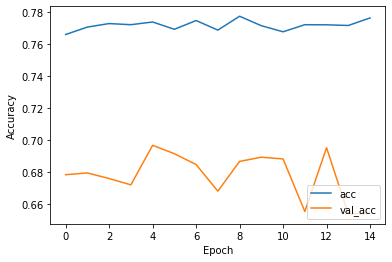

In [34]:

plt.plot(hist.history['acc'], label='acc')
plt.plot(hist.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')



In [32]:
model.save(keras_model_path) 